In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
from tqdm import tqdm
from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import pixel_to_skycoord, skycoord_to_pixel
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from scipy.ndimage.filters import gaussian_filter
tqdm.pandas()
import cmocean

from reproject.mosaicking import find_optimal_celestial_wcs
from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd

#plt.rcParams['text.usetex'] = True

C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\tqdm\std.py:706: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
PATH_RAW = 'D:/Workshop/PhD/Data/ViaLactea/PPMAP_Results/'
PATH_64x85 = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px_rejigged_fulltile/'
PATH_32x17 = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/32px_rejigged_fulltile_64pxwindow/'
PATH_32x85 = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/32px_rejigged_fulltile/'

In [4]:
hdu_l000_RAW = fits.open(f'{PATH_RAW}l000_results/l000_cdens.fits')[0]
hdu_l358_RAW = fits.open(f'{PATH_RAW}l358_results/l358_cdens.fits')[0]
hdu_l002_RAW = fits.open(f'{PATH_RAW}l002_results/l002_cdens.fits')[0]

hdu_l000_64x85 = np.loadtxt(f'{PATH_64x85}H/avg_data/000.txt')
hdu_l358_64x85 = np.loadtxt(f'{PATH_64x85}H/avg_data/358.txt')
hdu_l002_64x85 = np.loadtxt(f'{PATH_64x85}H/avg_data/002.txt')

hdu_l000_32x17 = np.loadtxt(f'{PATH_32x17}H/avg_data/000.txt')
hdu_l358_32x17 = np.loadtxt(f'{PATH_32x17}H/avg_data/358.txt')
hdu_l002_32x17 = np.loadtxt(f'{PATH_32x17}H/avg_data/002.txt')

hdu_l000_32x85 = np.loadtxt(f'{PATH_32x85}H/avg_data/000.txt')
hdu_l358_32x85 = np.loadtxt(f'{PATH_32x85}H/avg_data/358.txt')
hdu_l002_32x85 = np.loadtxt(f'{PATH_32x85}H/avg_data/002.txt')

In [5]:
hdus = [hdu_l000_RAW,hdu_l358_RAW,hdu_l002_RAW]
wcs, shape = find_optimal_celestial_wcs(hdus,projection='CAR')
array_RAW, footprint = reproject_and_coadd(hdus,
                                       wcs, shape_out=shape,
                                       reproject_function=reproject_interp)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.25s/it]


In [6]:
hdu_l000_64x85[hdu_l000_64x85==0] = np.nan
hdu_l000_64x85[hdu_l000_64x85>1] = 1
hdu_l358_64x85[hdu_l358_64x85==0] = np.nan
hdu_l358_64x85[hdu_l358_64x85>1] = 1
hdu_l002_64x85[hdu_l002_64x85==0] = np.nan
hdu_l002_64x85[hdu_l002_64x85>1] = 1

H_0_64x85 = hdu_l358_RAW.copy()
H_0_64x85.data = hdu_l358_64x85
H_1_64x85 = hdu_l000_RAW.copy()
H_1_64x85.data = hdu_l000_64x85
H_2_64x85 = hdu_l002_RAW.copy()
H_2_64x85.data = hdu_l002_64x85

hdu_H_64x85 = [H_0_64x85,H_1_64x85,H_2_64x85]
wcs_H_64x85, shape_H_64x85 = find_optimal_celestial_wcs(hdu_H_64x85,projection='CAR')
array_H_64x85, footprint_H_64x85 = reproject_and_coadd(hdu_H_64x85,
                                       wcs_H_64x85, shape_out=shape_H_64x85,
                                       reproject_function=reproject_interp)
###########################
hdu_l000_32x17[hdu_l000_32x17==0] = np.nan
hdu_l000_32x17[hdu_l000_32x17>1] = 1
hdu_l358_32x17[hdu_l358_32x17==0] = np.nan
hdu_l358_32x17[hdu_l358_32x17>1] = 1
hdu_l002_32x17[hdu_l002_32x17==0] = np.nan
hdu_l002_32x17[hdu_l002_32x17>1] = 1

H_0_32x17 = hdu_l358_RAW.copy()
H_0_32x17.data = hdu_l358_32x17
H_1_32x17 = hdu_l000_RAW.copy()
H_1_32x17.data = hdu_l000_32x17
H_2_32x17 = hdu_l002_RAW.copy()
H_2_32x17.data = hdu_l002_32x17

hdu_H_32x17 = [H_0_32x17,H_1_32x17,H_2_32x17]
wcs_H_32x17, shape_H_32x17 = find_optimal_celestial_wcs(hdu_H_32x17,projection='CAR')
array_H_32x17, footprint_H_32x17 = reproject_and_coadd(hdu_H_32x17,
                                       wcs_H_32x17, shape_out=shape_H_32x17,
                                       reproject_function=reproject_interp)
#############################
hdu_l000_32x85[hdu_l000_32x85==0] = np.nan
hdu_l000_32x85[hdu_l000_32x85>1] = 1
hdu_l358_32x85[hdu_l358_32x85==0] = np.nan
hdu_l358_32x85[hdu_l358_32x85>1] = 1
hdu_l002_32x85[hdu_l002_32x85==0] = np.nan
hdu_l002_32x85[hdu_l002_32x85>1] = 1

H_0_32x85 = hdu_l358_RAW.copy()
H_0_32x85.data = hdu_l358_32x85
H_1_32x85 = hdu_l000_RAW.copy()
H_1_32x85.data = hdu_l000_32x85
H_2_32x85 = hdu_l002_RAW.copy()
H_2_32x85.data = hdu_l002_32x85

hdu_H_32x85 = [H_0_32x85,H_1_32x85,H_2_32x85]
wcs_H_32x85, shape_H_32x85 = find_optimal_celestial_wcs(hdu_H_32x85,projection='CAR')
array_H_32x85, footprint_H_32x85 = reproject_and_coadd(hdu_H_32x85,
                                       wcs_H_32x85, shape_out=shape_H_32x85,
                                       reproject_function=reproject_interp)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.12s/it]


[<matplotlib.collections.LineCollection object at 0x000001F33AD7A708>] ['$\\log_{10}(10^{20} cm^{-2})$', '$\\log_{10}(10^{20} cm^{-2})$', '$\\log_{10}(10^{20} cm^{-2})$', '$\\log_{10}(10^{20} cm^{-2})$', '$\\log_{10}(10^{20} cm^{-2})$']


C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


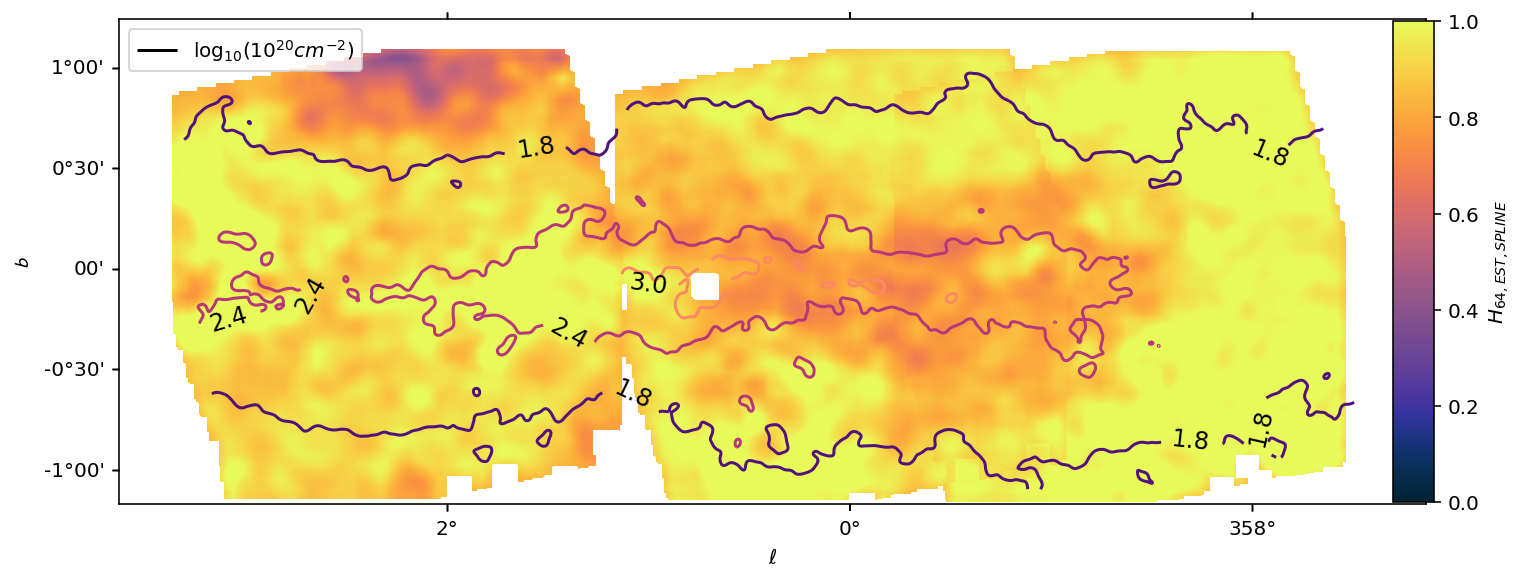

In [7]:
sigma = 10
plt.figure(figsize=(1080*(10/8)/144, 1080/144/2), dpi=144)

ax1 = plt.subplot(1,1, 1, projection=wcs_H_64x85)
im=plt.imshow(array_H_64x85, origin='lower', cmap=cmocean.cm.thermal, vmin=0, vmax=1)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel(r'$\cal b$')
cont = ax1.contour(gaussian_filter(np.log10(array_RAW),sigma), levels = 3, cmap='magma')
offset = 150
left,right = ax1.get_xlim()
plt.xlim(left-offset, right+offset)

plt.clabel(cont, fmt='%1.1f', colors = 'k', fontsize=12)

cax = plt.axes([0.96, 0.055, 0.03, 0.890])
plt.colorbar(im, cax=cax, label=r'$H_{64,EST,SPLINE}$')

h = [cont.collections[0]]
l = [r'$\log_{10}(10^{20} cm^{-2})$' for a in cont.levels]
print(h,l)
ax1.legend(h,l, loc='upper left')

plt.tight_layout()

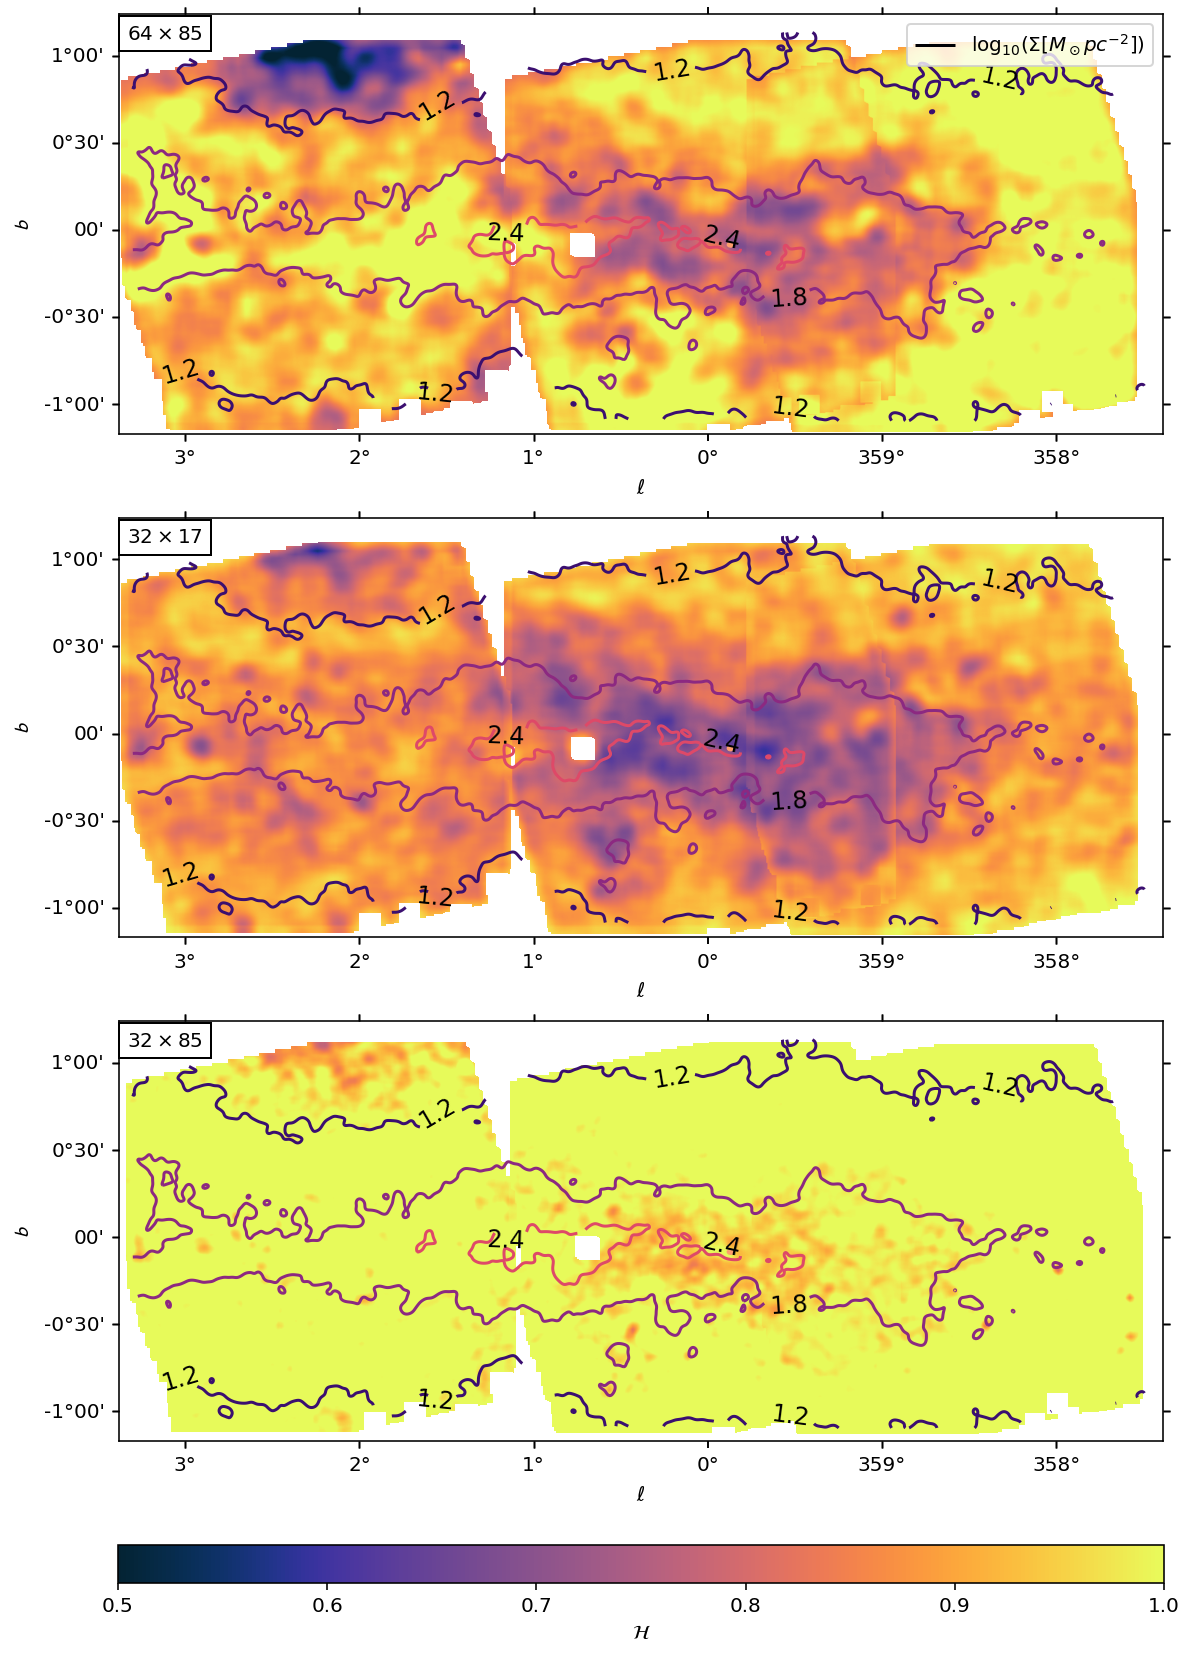

In [8]:
sigma = 10

fig = plt.figure(figsize=(1080*(10/8)/144, 1080*3.5/144/2), dpi=144)
ax = [fig.add_subplot(3,1,i+1, projection = wcs) for i in range(3)]

im = ax[0].imshow(array_H_64x85, origin='lower', cmap=cmocean.cm.thermal, vmin=0.5, vmax=1)
ax[0].set_xlabel(r'$\ell$')
ax[0].set_ylabel(r'$\cal b$')
cont = ax[0].contour(gaussian_filter(np.log10(array_RAW/2.72),sigma), levels = 3, cmap='magma')
plt.clabel(cont, fmt='%1.1f', colors = 'k', fontsize=12)

ax[1].imshow(array_H_32x17, origin='lower', cmap=cmocean.cm.thermal, vmin=0.5, vmax=1)
ax[1].set_xlabel(r'$\ell$')
ax[1].set_ylabel(r'$\cal b$')
cont = ax[1].contour(gaussian_filter(np.log10(array_RAW/2.72),sigma), levels = 3, cmap='magma')
plt.clabel(cont, fmt='%1.1f', colors = 'k', fontsize=12)

ax[2].imshow(array_H_32x85, origin='lower', cmap=cmocean.cm.thermal, vmin=0.5, vmax=1)
ax[2].set_xlabel(r'$\ell$')
ax[2].set_ylabel(r'$\cal b$')
cont = ax[2].contour(gaussian_filter(np.log10(array_RAW/2.72),sigma), levels = 3, cmap='magma')

cbaxes = fig.add_axes([0.1252, 0.05, 0.775, 0.02]) 
cb = plt.colorbar(im,orientation="horizontal", cax = cbaxes, label=r'$\cal H$')
plt.clabel(cont, fmt='%1.1f', colors = 'k', fontsize=12)

h = [cont.collections[0]]
l = [r'$\log_{10}(\Sigma [M_\odot pc^{-2}])$' for a in cont.levels]
ax[0].legend(h,l, loc='upper right')

ax[0].text(0.008,0.94, r'$64\times85$',
           bbox = dict(facecolor='white'), fontsize = 10, transform=ax[0].transAxes)

ax[1].text(0.008,0.94, r'$32\times17$',
           bbox = dict(facecolor='white'), fontsize = 10, transform=ax[1].transAxes)

ax[2].text(0.008,0.94, r'$32\times85$',
           bbox = dict(facecolor='white'), fontsize = 10, transform=ax[2].transAxes)
#plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/H_maps.png',bbox_inches="tight")
plt.show()

# S-maps

In [9]:
hdu_l000_RAW = fits.open(f'{PATH_RAW}l000_results/l000_cdens.fits')[0]
hdu_l358_RAW = fits.open(f'{PATH_RAW}l358_results/l358_cdens.fits')[0]
hdu_l002_RAW = fits.open(f'{PATH_RAW}l002_results/l002_cdens.fits')[0]

hdu_l000_64x85 = np.loadtxt(f'{PATH_64x85}S/avg_data/000.txt')
hdu_l358_64x85 = np.loadtxt(f'{PATH_64x85}S/avg_data/358.txt')
hdu_l002_64x85 = np.loadtxt(f'{PATH_64x85}S/avg_data/002.txt')

hdu_l000_32x17 = np.loadtxt(f'{PATH_32x17}S/avg_data/000.txt')
hdu_l358_32x17 = np.loadtxt(f'{PATH_32x17}S/avg_data/358.txt')
hdu_l002_32x17 = np.loadtxt(f'{PATH_32x17}S/avg_data/002.txt')

hdu_l000_32x85 = np.loadtxt(f'{PATH_32x85}S/avg_data/000.txt')
hdu_l358_32x85 = np.loadtxt(f'{PATH_32x85}S/avg_data/358.txt')
hdu_l002_32x85 = np.loadtxt(f'{PATH_32x85}S/avg_data/002.txt')

In [10]:
hdus = [hdu_l000_RAW,hdu_l358_RAW,hdu_l002_RAW]
wcs, shape = find_optimal_celestial_wcs(hdus,projection='CAR')
array_RAW, footprint = reproject_and_coadd(hdus,
                                       wcs, shape_out=shape,
                                       reproject_function=reproject_interp)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.32s/it]


In [11]:
hdu_l000_64x85[hdu_l000_64x85==0] = np.nan
#hdu_l000_64x85[hdu_l000_64x85>1] = 1
hdu_l358_64x85[hdu_l358_64x85==0] = np.nan
#hdu_l358_64x85[hdu_l358_64x85>1] = 1
hdu_l002_64x85[hdu_l002_64x85==0] = np.nan
#hdu_l002_64x85[hdu_l002_64x85>1] = 1

S_0_64x85 = hdu_l358_RAW.copy()
S_0_64x85.data = hdu_l358_64x85
S_1_64x85 = hdu_l000_RAW.copy()
S_1_64x85.data = hdu_l000_64x85
S_2_64x85 = hdu_l002_RAW.copy()
S_2_64x85.data = hdu_l002_64x85

hdu_S_64x85 = [S_0_64x85,S_1_64x85,S_2_64x85]
wcs_S_64x85, shape_S_64x85 = find_optimal_celestial_wcs(hdu_S_64x85,projection='CAR')
array_S_64x85, footprint_S_64x85 = reproject_and_coadd(hdu_S_64x85,
                                       wcs_S_64x85, shape_out=shape_S_64x85,
                                       reproject_function=reproject_interp)
###########################
hdu_l000_32x17[hdu_l000_32x17==0] = np.nan
#hdu_l000_32x17[hdu_l000_32x17>1] = 1
hdu_l358_32x17[hdu_l358_32x17==0] = np.nan
#hdu_l358_32x17[hdu_l358_32x17>1] = 1
hdu_l002_32x17[hdu_l002_32x17==0] = np.nan
#hdu_l002_32x17[hdu_l002_32x17>1] = 1

S_0_32x17 = hdu_l358_RAW.copy()
S_0_32x17.data = hdu_l358_32x17
S_1_32x17 = hdu_l000_RAW.copy()
S_1_32x17.data = hdu_l000_32x17
S_2_32x17 = hdu_l002_RAW.copy()
S_2_32x17.data = hdu_l002_32x17

hdu_S_32x17 = [S_0_32x17,S_1_32x17,S_2_32x17]
wcs_S_32x17, shape_S_32x17 = find_optimal_celestial_wcs(hdu_S_32x17,projection='CAR')
array_S_32x17, footprint_S_32x17 = reproject_and_coadd(hdu_S_32x17,
                                       wcs_S_32x17, shape_out=shape_S_32x17,
                                       reproject_function=reproject_interp)
#############################
hdu_l000_32x85[hdu_l000_32x85==0] = np.nan
#hdu_l000_32x85[hdu_l000_32x85>1] = 1
hdu_l358_32x85[hdu_l358_32x85==0] = np.nan
#hdu_l358_32x85[hdu_l358_32x85>1] = 1
hdu_l002_32x85[hdu_l002_32x85==0] = np.nan
#hdu_l002_32x85[hdu_l002_32x85>1] = 1

S_0_32x85 = hdu_l358_RAW.copy()
S_0_32x85.data = hdu_l358_32x85
S_1_32x85 = hdu_l000_RAW.copy()
S_1_32x85.data = hdu_l000_32x85
S_2_32x85 = hdu_l002_RAW.copy()
S_2_32x85.data = hdu_l002_32x85

hdu_S_32x85 = [S_0_32x85,S_1_32x85,S_2_32x85]
wcs_S_32x85, shape_S_32x85 = find_optimal_celestial_wcs(hdu_S_32x85,projection='CAR')
array_S_32x85, footprint_S_32x85 = reproject_and_coadd(hdu_S_32x85,
                                       wcs_S_32x85, shape_out=shape_S_32x85,
                                       reproject_function=reproject_interp)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.23s/it]


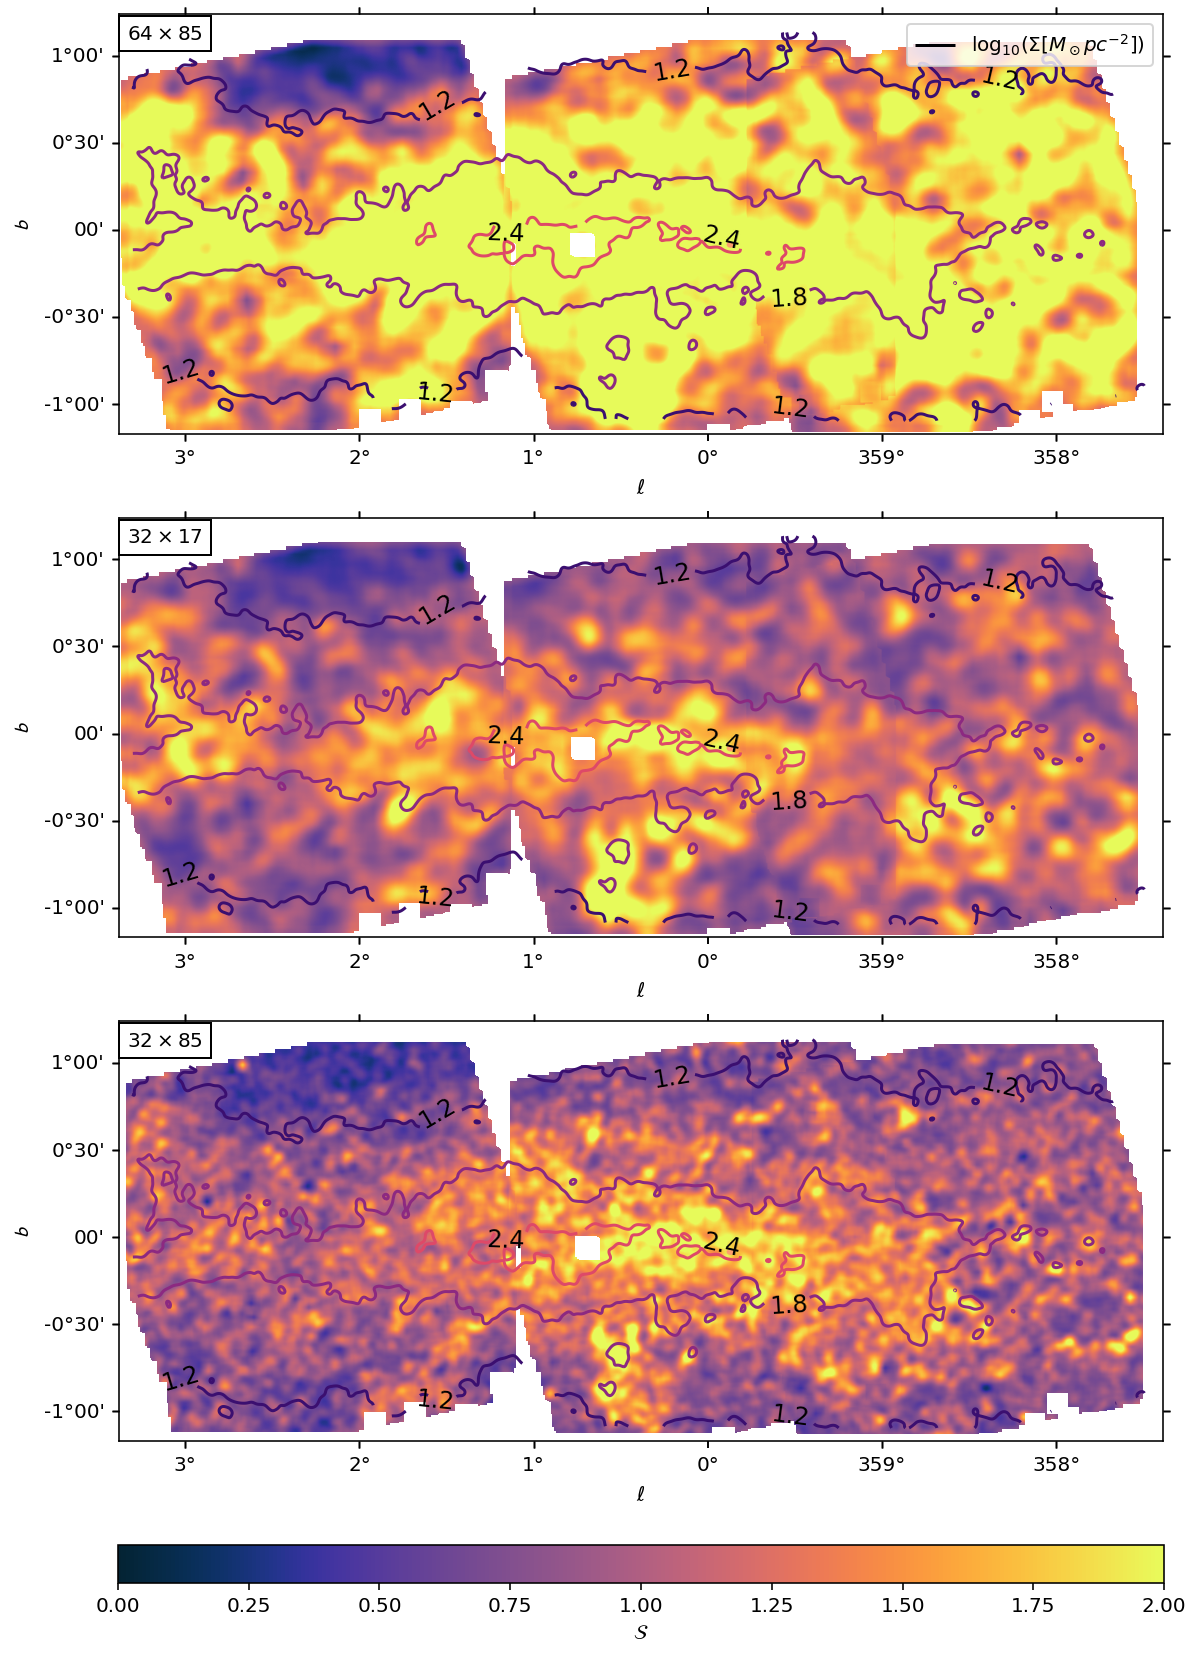

In [12]:
sigma = 10

fig = plt.figure(figsize=(1080*(10/8)/144, 1080*3.5/144/2), dpi=144)
ax = [fig.add_subplot(3,1,i+1, projection = wcs) for i in range(3)]

im = ax[0].imshow(array_S_64x85, origin='lower', cmap=cmocean.cm.thermal, vmin=0, vmax=2)
ax[0].set_xlabel(r'$\ell$')
ax[0].set_ylabel(r'$\cal b$')
cont = ax[0].contour(gaussian_filter(np.log10(array_RAW/2.72),sigma), levels = 3, cmap='magma')
plt.clabel(cont, fmt='%1.1f', colors = 'k', fontsize=12)

ax[1].imshow(array_S_32x17, origin='lower', cmap=cmocean.cm.thermal, vmin=0, vmax=2)
ax[1].set_xlabel(r'$\ell$')
ax[1].set_ylabel(r'$\cal b$')
cont = ax[1].contour(gaussian_filter(np.log10(array_RAW/2.72),sigma), levels = 3, cmap='magma')
plt.clabel(cont, fmt='%1.1f', colors = 'k', fontsize=12)

ax[2].imshow(array_S_32x85, origin='lower', cmap=cmocean.cm.thermal, vmin=0, vmax=2)
ax[2].set_xlabel(r'$\ell$')
ax[2].set_ylabel(r'$\cal b$')
cont = ax[2].contour(gaussian_filter(np.log10(array_RAW/2.72),sigma), levels = 3, cmap='magma')
plt.clabel(cont, fmt='%1.1f', colors = 'k', fontsize=12)

cbaxes = fig.add_axes([0.1252, 0.05, 0.775, 0.02]) 
cb = plt.colorbar(im,orientation="horizontal", cax = cbaxes, label=r'$\cal S$')


h = [cont.collections[0]]
l = [r'$\log_{10}(\Sigma [M_\odot pc^{-2}])$' for a in cont.levels]
ax[0].legend(h,l, loc='upper right')

ax[0].text(0.008,0.94, r'$64\times85$',
           bbox = dict(facecolor='white'), fontsize = 10, transform=ax[0].transAxes)

ax[1].text(0.008,0.94, r'$32\times17$',
           bbox = dict(facecolor='white'), fontsize = 10, transform=ax[1].transAxes)

ax[2].text(0.008,0.94, r'$32\times85$',
           bbox = dict(facecolor='white'), fontsize = 10, transform=ax[2].transAxes)

plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/S_maps_2.png',bbox_inches="tight")
plt.show()

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


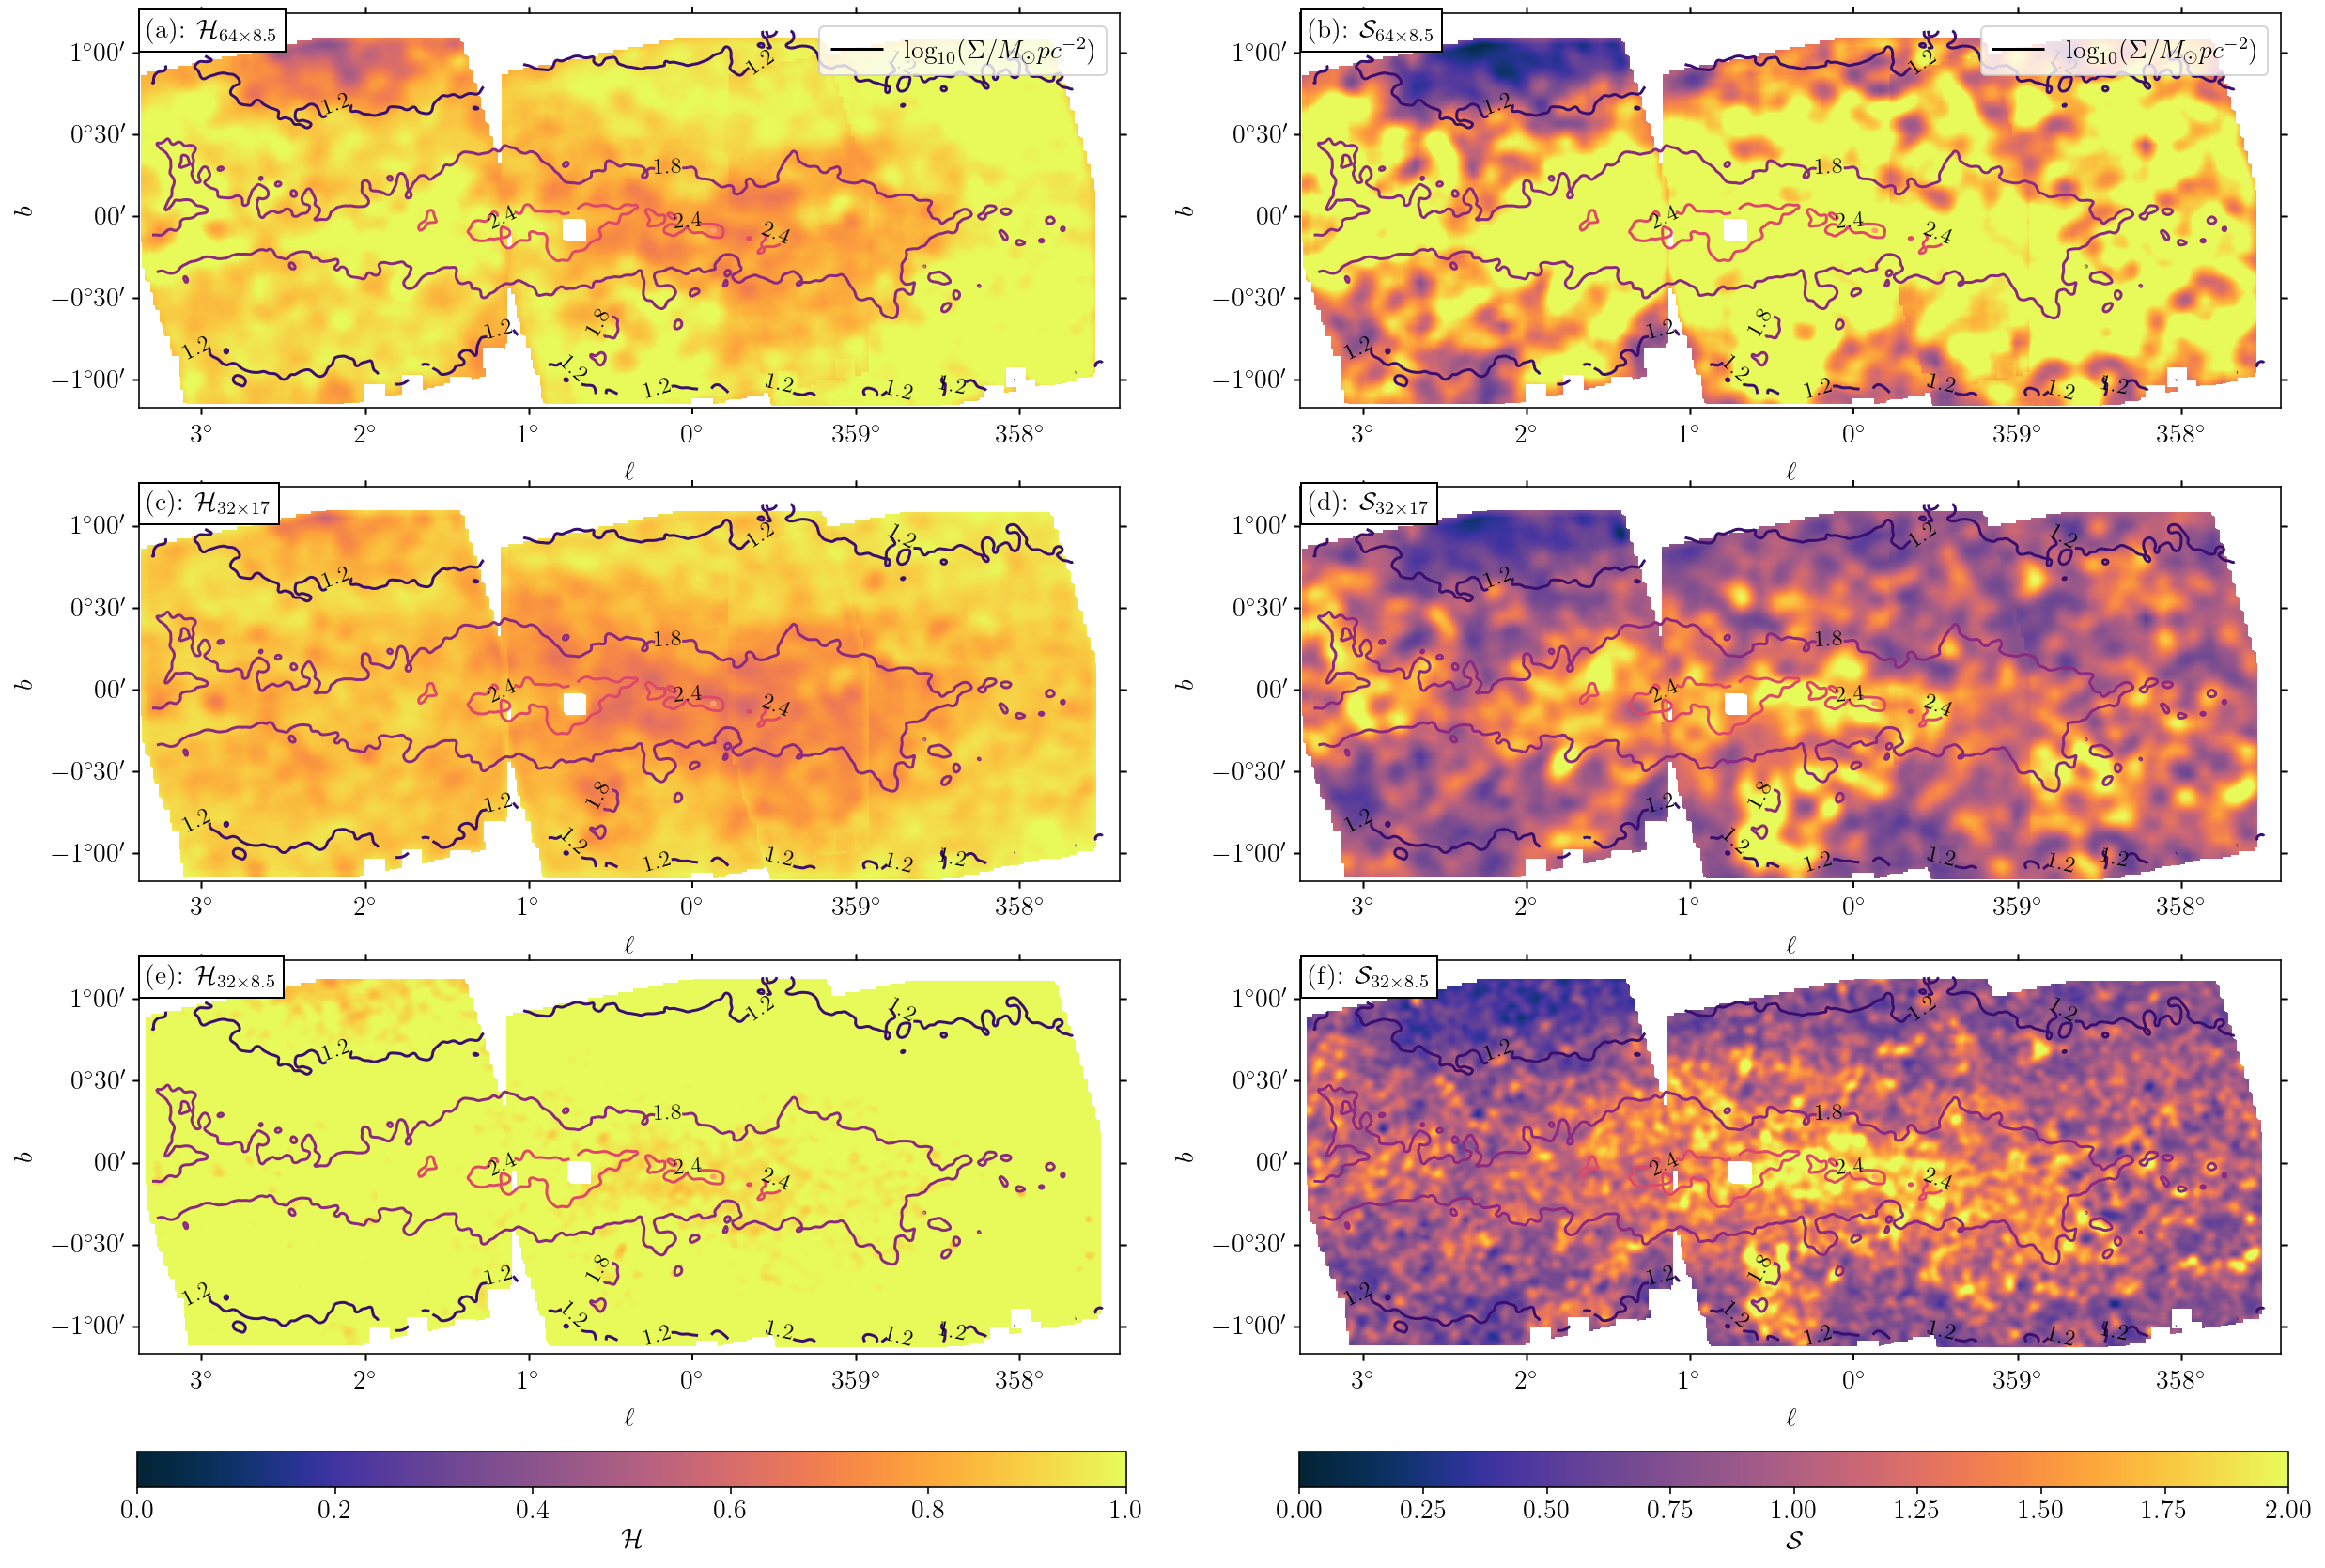

In [15]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "font.size":14
})

sigma = 10

fig = plt.figure(figsize=(1080*(10/8)*3/144, 1080*3.5/144/2), dpi=144)
ax = [fig.add_subplot(3,2,i+1, projection = wcs) for i in range(6)]

im = ax[0].imshow(array_H_64x85, origin='lower', cmap=cmocean.cm.thermal, vmin=0, vmax=1)
ax[0].set_xlabel(r'$\ell$')
ax[0].set_ylabel(r'$b$')
cont = ax[0].contour(gaussian_filter(np.log10(array_RAW/2.72),sigma), levels = 3, cmap='magma')
plt.clabel(cont, fmt='%1.1f', colors = 'k', fontsize=12)

ax[2].imshow(array_H_32x17, origin='lower', cmap=cmocean.cm.thermal, vmin=0, vmax=1)
ax[2].set_xlabel(r'$\ell$')
ax[2].set_ylabel(r'$b$')
cont = ax[2].contour(gaussian_filter(np.log10(array_RAW/2.72),sigma), levels = 3, cmap='magma')
plt.clabel(cont, fmt='%1.1f', colors = 'k', fontsize=12)

ax[4].imshow(array_H_32x85, origin='lower', cmap=cmocean.cm.thermal, vmin=0, vmax=1)
ax[4].set_xlabel(r'$\ell$')
ax[4].set_ylabel(r'$b$')
cont = ax[4].contour(gaussian_filter(np.log10(array_RAW/2.72),sigma), levels = 3, cmap='magma')

cbaxes = fig.add_axes([0.2305, 0.05, 0.26, 0.02]) 
cb = plt.colorbar(im,orientation="horizontal", cax = cbaxes, label=r'$\cal H$')
plt.clabel(cont, fmt='%1.1f', colors = 'k', fontsize=12)

h = [cont.collections[0]]
l = [r'$\log_{10}(\Sigma /M_\odot pc^{-2})$' for a in cont.levels]
ax[0].legend(h,l, loc='upper right')

ax[0].text(0.008,0.94, r'(a): ${\cal{H}}_{64\times8.5}$',
           bbox = dict(facecolor='white'), transform=ax[0].transAxes)

ax[2].text(0.008,0.94, r'(c): ${\cal{H}}_{32\times17}$',
           bbox = dict(facecolor='white'), transform=ax[2].transAxes)

ax[4].text(0.008,0.94, r'(e): ${\cal{H}}_{32\times8.5}$',
           bbox = dict(facecolor='white'), transform=ax[4].transAxes)


######## RIGHT SIDE ########

im = ax[1].imshow(array_S_64x85, origin='lower', cmap=cmocean.cm.thermal, vmin=0, vmax=2)
ax[1].set_xlabel(r'$\ell$')
ax[1].set_ylabel(r'$b$')
cont = ax[1].contour(gaussian_filter(np.log10(array_RAW/2.72),sigma), levels = 3, cmap='magma')
plt.clabel(cont, fmt='%1.1f', colors = 'k', fontsize=12)

ax[3].imshow(array_S_32x17, origin='lower', cmap=cmocean.cm.thermal, vmin=0, vmax=2)
ax[3].set_xlabel(r'$\ell$')
ax[3].set_ylabel(r'$b$')
cont = ax[3].contour(gaussian_filter(np.log10(array_RAW/2.72),sigma), levels = 3, cmap='magma')
plt.clabel(cont, fmt='%1.1f', colors = 'k', fontsize=12)

ax[5].imshow(array_S_32x85, origin='lower', cmap=cmocean.cm.thermal, vmin=0, vmax=2)
ax[5].set_xlabel(r'$\ell$')
ax[5].set_ylabel(r'$b$')
cont = ax[5].contour(gaussian_filter(np.log10(array_RAW/2.72),sigma), levels = 3, cmap='magma')
plt.clabel(cont, fmt='%1.1f', colors = 'k', fontsize=12)

ax[1].legend(h,l, loc='upper right')
 
ax[1].text(0.008,0.94, r'(b): ${\cal{S}}_{64\times8.5}$',
           bbox = dict(facecolor='white'), transform=ax[1].transAxes)

ax[3].text(0.008,0.94, r'(d): ${\cal{S}}_{32\times17}$',
           bbox = dict(facecolor='white'), transform=ax[3].transAxes)

ax[5].text(0.008,0.94, r'(f): ${\cal{S}}_{32\times8.5}$',
           bbox = dict(facecolor='white'), transform=ax[5].transAxes)

cbaxes_S = fig.add_axes([0.536, 0.05, 0.26, 0.02]) 
cb_S = plt.colorbar(im,orientation="horizontal", cax = cbaxes_S, label=r'$\cal S$')

fig.subplots_adjust(wspace = -0.35)
plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/HS_maps_3.png',bbox_inches="tight")
plt.show()